# Exploration of the Internation Space Station

### - Find a public API that provides real-time data without the need for registration. 
[Open-Notify-API](!http://open-notify.org/Open-Notify-API/) is an API put together by Nathan Bergey to provide services which include showing the [current position of the ISS in space](!http://api.open-notify.org/iss-now.json) and the [current number of people in space](!http://api.open-notify.org/astros.json).

### - Use Python and requests to retrieve the data from the API, and transform it into a format that is suitable for storage and analysis. This can involve cleaning the data, normalizing the data, or converting the data to a different format

#### Import Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import time

from prettymaps import *

from matplotlib import pyplot as plt

from geopy.geocoders import Nominatim

import warnings

warnings.filterwarnings('ignore')

In [2]:
!pip freeze > requirements.txt
# help(prettymaps.draw)

#### Fetch the current ISS location data

In [3]:
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['monospace']

In [4]:
def fetch_iss_location():
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = response.json()
    lat = float(data['iss_position']['latitude'])
    lon = float(data['iss_position']['longitude'])
    return lat, lon

# Define the location and radius of the map
location = fetch_iss_location()
radius = 1500
plot_layers = {
        'green': {
            'tags': {
                'landuse': 'grass',
                'natural': ['island', 'wood'],
                'leisure': 'park'
            }
        },
        'forest': {
            'tags': {
                'landuse': 'forest'
            }
        },
        'water': {
            'tags': {
                'natural': ['water', 'bay']
            }
        },
        'parking': {
            'tags': {
                'amenity': 'parking',
                'highway': 'pedestrian',
                'man_made': 'pier'
            }
        },
        'streets': {
            'width': {
                'motorway': 5,
                'trunk': 4,
                'primary': 3.5,
                'secondary': 3,
                'tertiary': 2.5,
                'residential': 2,
                'service': 1.5,
                'pedestrian': 1,
                'footway': 1,
            }
        }
    }
plot_style = {
    'padding': 0.01,
    'perimeter': {'fc': '#F2F4CB', 'ec': '#2F3737', 'hatch': 'ooo...','lw': 4, 'zorder': 7},
    "background": {
        "fc": "#F2F4CB",
        "ec": "#dadbc1",
        "hatch": "ooo...",
    },
    "perimeter": {
        "fc": "#F2F4CB",
        "ec": "#dadbc1",
        "lw": 0,
        "hatch": "ooo...",
    },
    "green": {
        "fc": "#D0F1BF",
        "ec": "#2F3737",
        "lw": 1,
    },
    "forest": {
        "fc": "#64B96A",
        "ec": "#2F3737",
        "lw": 1,
    },
    "water": {
        "fc": "#a1e3ff",
        "ec": "#2F3737",
        "hatch": "ooo...",
        "hatch_c": "#85c9e6",
        "lw": 1,
    },
    "parking": {
        "fc": "#F2F4CB",
        "ec": "#2F3737",
        "lw": 1,
    },
    "streets": {
        "fc": "#2F3737",
        "ec": "#475657",
        "alpha": 1,
        "lw": 0,
    },
    "building": {
        "palette": [
            "#FFC857",
            "#E9724C",
            "#C5283D"
        ],
        "ec": "#2F3737",
        "lw": 0.5,
    }}


In [5]:
# Check if coordinates are in the ocean
def checkOcean(lat, lon):
    ''''Returns True if coordinates are in the ocean, False otherwise'''
    geolocator = Nominatim(user_agent="iss")
    max_attampts = 5
    attempt_count = 0

    while True:
        curr_location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        # print(f"attempt_count: {attempt_count}")
        if curr_location is None:
            print(f"Location is in the sea")
            return True
        else:
            print(f"Getting address of {curr_location}")
            # Check if the curr_location is in the ocean
            address = curr_location.address.lower()
            # Return true and break out of while if the address contains the word 'ocean' or 'sea' or 'lake' or 'river' or 'bay' or there is no address
            if 'ocean' in address or 'sea' in address:
                # print(f"Attempt: {attempt_count}, \n Address: {curr_location.address}, \n In ocean")
                return True
            else:
                # print(f"Attempt: {attempt_count}, \n Address: {curr_location.address}, \n Not in ocean")
                return False


In [6]:
display(location)
checkOcean(location[0], location[1])

(-50.7641, -63.1539)

Location is in the sea


True

_I want to use __prettymaps__ to display the map_

In [7]:
def drawMapWithPrettymaps(location, radius = 10000):
    '''Returns a map of the location with prettymaps or Just a blue map and the coordinates if the location is in the ocean'''
    plot_layers = {
        'green': {
            'tags': {
                'landuse': 'grass',
                'natural': ['island', 'wood'],
                'leisure': 'park'
            }
        },
        'forest': {
            'tags': {
                'landuse': 'forest'
            }
        },
        'water': {
            'tags': {
                'natural': ['water', 'bay']
            }
        },
        'parking': {
            'tags': {
                'amenity': 'parking',
                'highway': 'pedestrian',
                'man_made': 'pier'
            }
        },
        'streets': {
            'width': {
                'motorway': 5,
                'trunk': 4,
                'primary': 3.5,
                'secondary': 3,
                'tertiary': 2.5,
                'residential': 2,
                'service': 1.5,
                'pedestrian': 1,
                'footway': 1,
            }
        }
        }
    plot_style = {
        'padding': 0.01,
        'perimeter': {'fc': '#F2F4CB', 'ec': '#2F3737', 'hatch': 'ooo...','lw': 4, 'zorder': 7},
        "background": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "hatch": "ooo...",
        },
        "perimeter": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "lw": 0,
            "hatch": "ooo...",
        },
        "green": {
            "fc": "#D0F1BF",
            "ec": "#2F3737",
            "lw": 1,
        },
        "forest": {
            "fc": "#64B96A",
            "ec": "#2F3737",
            "lw": 1,
        },
        "water": {
            "fc": "#a1e3ff",
            "ec": "#2F3737",
            "hatch": "ooo...",
            "hatch_c": "#85c9e6",
            "lw": 1,
        },
        "parking": {
            "fc": "#F2F4CB",
            "ec": "#2F3737",
            "lw": 1,
        },
        "streets": {
            "fc": "#2F3737",
            "ec": "#475657",
            "alpha": 1,
            "lw": 0,
        },
        "building": {
            "palette": [
                "#FFC857",
                "#E9724C",
                "#C5283D"
            ],
            "ec": "#2F3737",
            "lw": 0.5,
        }}

        # Check if the location is in the ocean
    if not checkOcean(location[0], location[1]):
        print(f"{location} is not in the ocean")
        # Draw a map with just the coordinates
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_axis_off()

        map = plot(
            query = location,
            radius = radius,
            layers=plot_layers,
            style=plot_style,
            ax=ax,
            credit=False,
            circle=True
        )
        
        return fig, ax
    else:
        # Return a blue square via matplotlib with the coordinates at the bottom left
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_facecolor('#a1e3ff')
        # print coordinates at the bottom left
        ax.text(0.63, 0.02, f" {location}", fontsize=18)
        ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)

        # Remove the border
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        plt.show()
        
        return fig, ax


I learnt:  
- Prettymaps doesn't display maps with coordinates over the sea. 
    - ➡️💡 So I replaced with water bodies with a blue square

Location is in the sea


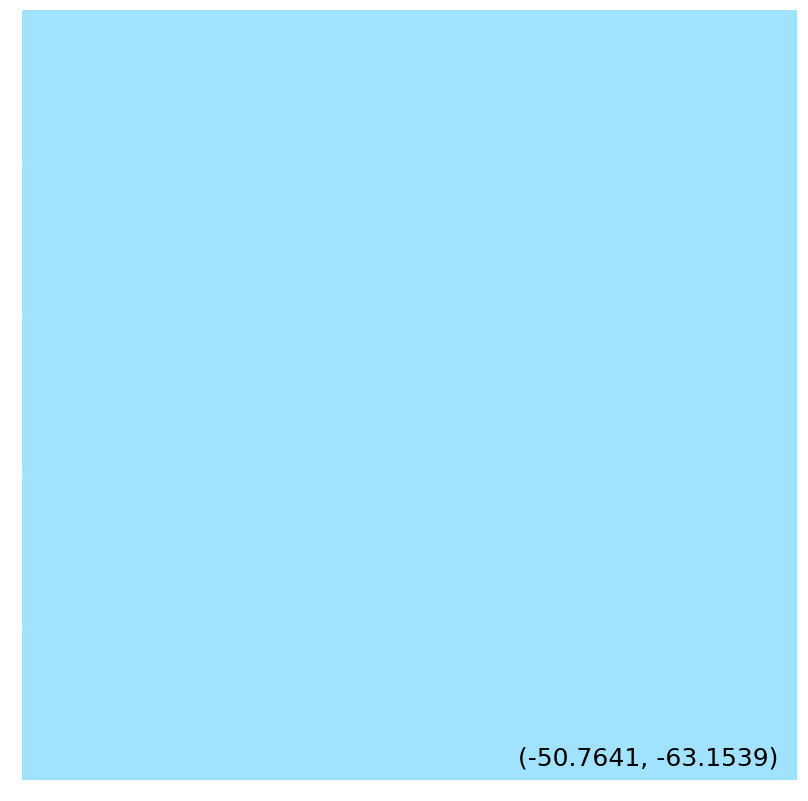

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [8]:
drawMapWithPrettymaps(location)

<!-- Now how to represent the people in the ISS
- Just write FirstName and Initials
- Write the count of people then on the side the names -->

#### How to represent the people in the ISS
##### Options:
- Just write FirstName and Initials
- Write the count of people then on the side the names

In [9]:
# Fetch the names of the people in space
def fetch_iss_occupants():
    response = requests.get("http://api.open-notify.org/astros.json")
    response.raise_for_status()
    names = [person["name"] for person in response.json()["people"]]
    crafts = [person["craft"] for person in response.json()["people"]]
    return names, crafts

print(fetch_iss_occupants())

(['Sergey Prokopyev', 'Dmitry Petelin', 'Frank Rubio', 'Stephen Bowen', 'Warren Hoburg', 'Sultan Alneyadi', 'Andrey Fedyaev', 'Jing Haiping', 'Gui Haichow', 'Zhu Yangzhu'], ['ISS', 'ISS', 'ISS', 'ISS', 'ISS', 'ISS', 'ISS', 'Tiangong', 'Tiangong', 'Tiangong'])


craft dictionary: {'ISS': ['Sergey Prokopyev', 'Dmitry Petelin', 'Frank Rubio', 'Stephen Bowen', 'Warren Hoburg', 'Sultan Alneyadi', 'Andrey Fedyaev'], 'Tiangong': ['Jing Haiping', 'Gui Haichow', 'Zhu Yangzhu']}


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

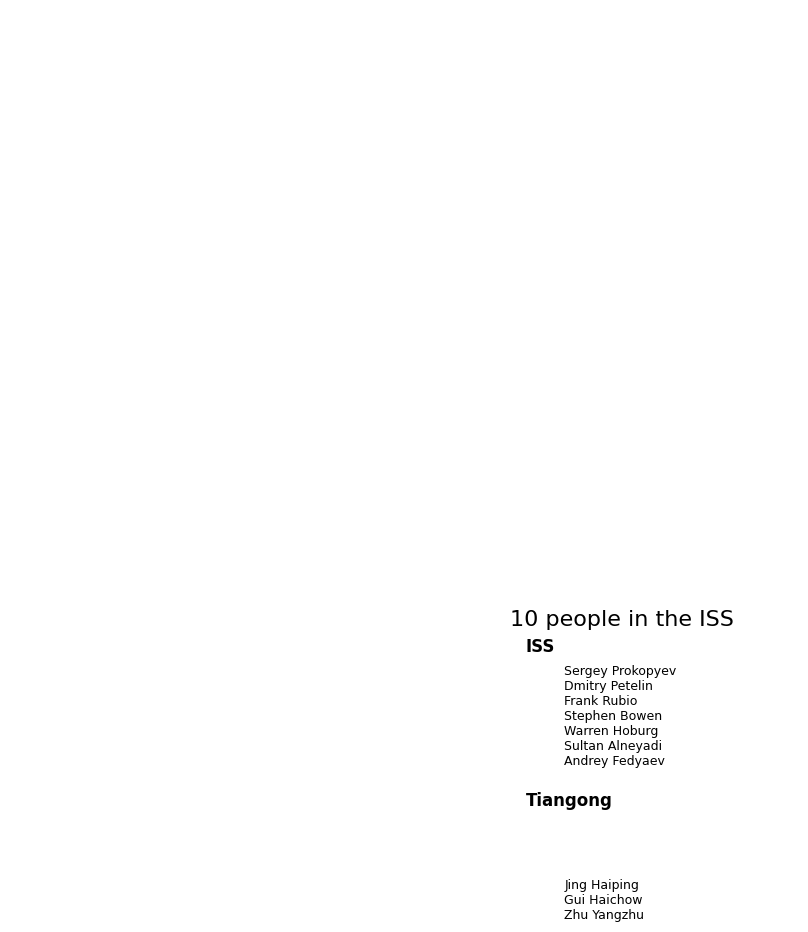

In [27]:
def peopleInISS():
    '''Returns text representing the number of people in the ISS '''
    people, crafts = fetch_iss_occupants()
    # Combine into a dictionary with the craft as the key and the people as the value
    craft_dict = {}
    for craft, person in zip(crafts, people):
        if craft not in craft_dict:
            craft_dict[craft] = []
        craft_dict[craft].append(person)
    print(f"craft dictionary: {craft_dict}")
    # Print the number of people in the ISS and their names in a figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    y_start = 0.17
    # print the number of people and the names of the people in the bottom left
    ax.text(0.63, y_start, f"{len(people)} people in the ISS\n", fontsize=16) 
    for craft, passengers in craft_dict.items():
        ax.text(0.65, y_start - 0.03, f'{craft}\n', fontsize=12, fontweight=700)
        ax.text(0.70, y_start - 0.15, "\n".join(passengers), fontsize=9)
        ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)
        
        y_start -= 0.2  # Adjust the y-coordinate for the next set of text

    # Remove the border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return fig, ax

peopleInISS()

Location is in the sea


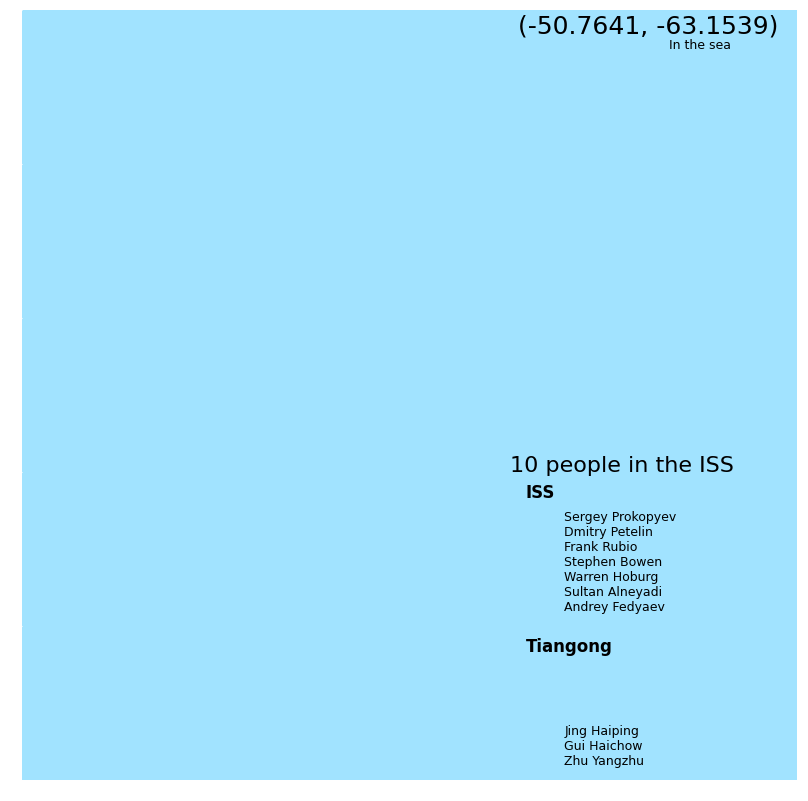

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [31]:
def drawMapWithPrettymaps(location, radius = 1000):
    '''Returns a map of the location with prettymaps or Just a blue map and the coordinates if the location is in the ocean'''
    plot_layers = {
        'green': {
            'tags': {
                'landuse': 'grass',
                'natural': ['island', 'wood'],
                'leisure': 'park'
            }
        },
        'forest': {
            'tags': {
                'landuse': 'forest'
            }
        },
        'water': {
            'tags': {
                'natural': ['water', 'bay']
            }
        },
        'parking': {
            'tags': {
                'amenity': 'parking',
                'highway': 'pedestrian',
                'man_made': 'pier'
            }
        },
        'streets': {
            'width': {
                'motorway': 5,
                'trunk': 4,
                'primary': 3.5,
                'secondary': 3,
                'tertiary': 2.5,
                'residential': 2,
                'service': 1.5,
                'pedestrian': 1,
                'footway': 1,
            }
        }
        }
    plot_style = {
        'padding': 0.01,
        'perimeter': {'fc': '#F2F4CB', 'ec': '#2F3737', 'hatch': 'ooo...','lw': 4, 'zorder': 7},
        "background": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "hatch": "ooo...",
        },
        "perimeter": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "lw": 0,
            "hatch": "ooo...",
        },
        "green": {
            "fc": "#D0F1BF",
            "ec": "#2F3737",
            "lw": 1,
        },
        "forest": {
            "fc": "#64B96A",
            "ec": "#2F3737",
            "lw": 1,
        },
        "water": {
            "fc": "#a1e3ff",
            "ec": "#2F3737",
            "hatch": "ooo...",
            "hatch_c": "#85c9e6",
            "lw": 1,
        },
        "parking": {
            "fc": "#F2F4CB",
            "ec": "#2F3737",
            "lw": 1,
        },
        "streets": {
            "fc": "#2F3737",
            "ec": "#475657",
            "alpha": 1,
            "lw": 0,
        },
        "building": {
            "palette": [
                "#FFC857",
                "#E9724C",
                "#C5283D"
            ],
            "ec": "#2F3737",
            "lw": 0.5,
        }}

        # Check if the location is in the ocean
    people, crafts = fetch_iss_occupants()
    # Combine into a dictionary with the craft as the key and the people as the value
    craft_dict = {}
    for craft, person in zip(crafts, people):
        if craft not in craft_dict:
            craft_dict[craft] = []
        craft_dict[craft].append(person)
    # print(craft_dict)
    if not checkOcean(location[0], location[1]):
        print(f"{location} is not in the ocean")
        # Draw a map with just the coordinates
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_axis_off()

        map = plot(
            query = location,
            radius = radius,
            layers=plot_layers,
            style=plot_style,
            ax=ax,
            credit=False,
            circle=True,
            dilate=True,
            scale_x=.5,
            scale_y=.5,
        )

        # print the number of people and the names of the people in the bottom left
        y_start = 0.37
        # print the number of people and the names of the people in the bottom left
        ax.text(0.63, y_start, f"{len(people)} people in the ISS\n", fontsize=16) 
        for craft, passengers in craft_dict.items():
            ax.text(0.65, y_start - 0.03, f'{craft}\n', fontsize=12, fontweight=700)
            ax.text(0.70, y_start - 0.15, "\n".join(passengers), fontsize=9)
            ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)

            y_start -= 0.2  # Adjust the y-coordinate for the next set of text
        """ax.text(0.63, 0.17, f"{len(people)} people in the ISS\n" ,fontsize=16) 
        ax.text(0.63, 0.14, f'ISS\n' ,fontsize=14)
        ax.text(0.83, 0.14, f'Shenzhou 15\n' ,fontsize=14)
        ax.text(0.63, 0.02, "\n".join(craft_dict['ISS']) ,fontsize=9)
        ax.text(0.83, 0.10, "\n".join(craft_dict['Shenzhou 15']) ,fontsize=9)
        ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)"""
        
        return fig, ax
    else:
        # Return a blue square via matplotlib with the coordinates at the bottom left
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_facecolor('#a1e3ff')
        # print coordinates at the bottom left
        ax.text(0.63, 0.97, f" {location}", fontsize=18)
        ax.text(0.83, 0.95, f" In the sea", fontsize=9)
        ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)
        # print the number of people and the names of the people in the bottom left
        y_start = 0.37
        # print the number of people and the names of the people in the bottom left
        ax.text(0.63, y_start, f"{len(people)} people in the ISS\n", fontsize=16) 
        for craft, passengers in craft_dict.items():
            ax.text(0.65, y_start - 0.03, f'{craft}\n', fontsize=12, fontweight=700)
            ax.text(0.70, y_start - 0.15, "\n".join(passengers), fontsize=9)
            ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)

            y_start -= 0.2  # Adjust the y-coordinate for the next set of text
        """ax.text(0.63, 0.17, f"{len(people)} people in the ISS\n" ,fontsize=16) 
        ax.text(0.63, 0.14, f'ISS\n' ,fontsize=14)
        ax.text(0.83, 0.14, f'Shenzhou 15\n' ,fontsize=14)
        ax.text(0.63, 0.02, "\n".join(craft_dict['ISS']) ,fontsize=9)
        ax.text(0.83, 0.10, "\n".join(craft_dict['Shenzhou 15']) ,fontsize=9)
        ax.tick_params(axis='both', which='both', colors='white', labelsize=.1)"""

        # Remove the border
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        plt.show()
        
        return fig, ax

drawMapWithPrettymaps(location)

#### Run the final function every 2 minutes

In [ ]:
count = 0
while count<10:
    count += 1
    # time.sleep(10)
    new_location = fetch_iss_location()
    drawMapWithPrettymaps(new_location)
    print(count,'\n')